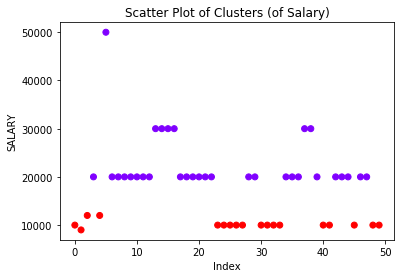

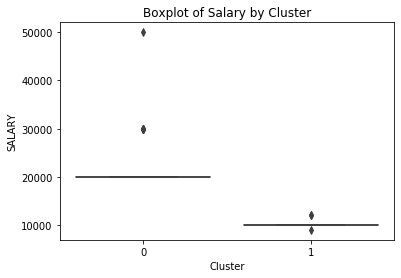

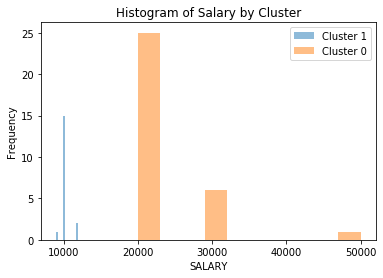

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

# Read data from Excel file
file_path = r'C:\Users\Jennie\Desktop\jiaoshi.xlsx'
df = pd.read_excel(file_path, header=0)

# Drop missing values for the selected column
selected_column = 'SALARY'
df = df.dropna(subset=[selected_column])

# Perform KMeans clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df[[selected_column]])

# Visualization
# 1. Scatter Plot
plt.scatter(df.index, df[selected_column], c=df['cluster'], cmap='rainbow')
plt.xlabel('Index')
plt.ylabel(selected_column)
plt.title('Scatter Plot of Clusters (of Salary)')
plt.show()

# 2. Boxplot
sns.boxplot(x='cluster', y=selected_column, data=df)
plt.xlabel('Cluster')
plt.ylabel(selected_column)
plt.title('Boxplot of Salary by Cluster')
plt.show()

# 3. Histogram
for cluster_label in df['cluster'].unique():
    plt.hist(df[df['cluster'] == cluster_label][selected_column], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel(selected_column)
plt.ylabel('Frequency')
plt.title('Histogram of Salary by Cluster')
plt.legend()
plt.show()